# Unsupervised Machine Learning: Clustering

## Contents
### 01 Importing libraries and data set
### 02 Data cleaning
### 03 Standardising data
### 04 The elbow technique
### 05 k-means clustering

## 01 Importing libraries and data set

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn 
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating path
path = r'C:\Users\zunai\OneDrive\Documents\Data Analytics\Achievement 6\Boat listings analysis'

In [4]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'boat_data_cleaned.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3535.0,Switzerland,Seengen
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4646.0,Switzerland,Zugersee


## 02 Data cleaning

In [6]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [7]:
# Rename columns
df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [8]:
# Keep only numeric variables
df1 = df[['Length','Width','7days_views','EUR_price']]

In [9]:
df1.head()

,Length,Width,7days_views,EUR_price
0,4.00,1.50,75,3490.0
1,3.55,1.46,58,3399.0
2,4.35,1.75,239,3535.0
3,4.70,2.00,69,3500.0
4,4.40,1.65,113,4646.0


In [10]:
df1.shape

(6001, 4)

## 03 Standardising data

In [11]:
# Standardising data
scaler = StandardScaler()
standardised_data = scaler.fit_transform(df1)
print(standardised_data)

[[-1.41005333 -1.76743232 -0.52645641 -0.36229761]
 [-1.50289423 -1.8047781  -0.62569917 -0.36244028]
 [-1.33784374 -1.53402117  0.43094436 -0.36222706]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.35993095]
 [-1.32752808 -1.48733894  1.10229246 -0.36071566]
 [-1.49257857 -1.67406786  0.16824293 -0.36178367]]


In [12]:
# Coverting stardised data in dataframe
df1 = pd.DataFrame(standardised_data, columns = df1.columns)
print(df1)

        Length     Width  7days_views  EUR_price
0    -1.410053 -1.767432    -0.526456  -0.362298
1    -1.502894 -1.804778    -0.625699  -0.362440
2    -1.337844 -1.534021     0.430944  -0.362227
3    -1.265634 -1.300610    -0.561483  -0.362282
4    -1.327528 -1.627386    -0.304620  -0.360485
...        ...       ...          ...        ...
5996 -0.749851 -0.647059     6.619022  -0.359852
5997 -0.997427 -1.207246    10.226789  -0.359853
5998 -0.997427 -1.655395     0.716997  -0.359931
5999 -1.327528 -1.487339     1.102292  -0.360716
6000 -1.492579 -1.674068     0.168243  -0.361784

[6001 rows x 4 columns]


## 04 The elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters = i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [14]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))]
score

[-24004.0,
 -15675.061139948562,
 -11917.89312246989,
 -9075.705919277378,
 -7104.565723139938,
 -6077.39449653189,
 -5329.264170679737,
 -4611.8717016078745,
 -4125.109680620591]

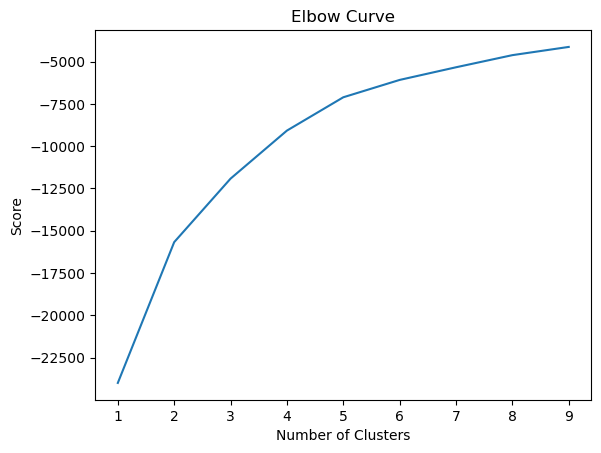

In [15]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### After 5 the curve begins to straighten out. This means the optimal count for clusters is 5.

## 05 kmeans clustering

In [16]:
# Create the k-means object
kmeans = KMeans(n_clusters = 5)

In [17]:
# Fit the k-means object to the data
kmeans.fit(df1)

KMeans(n_clusters=5)

In [18]:
df1['clusters'] = kmeans.fit_predict(df1)

In [19]:
df1.head()

,Length,Width,7days_views,EUR_price,clusters
0,-1.410053,-1.767432,-0.526456,-0.362298,0
1,-1.502894,-1.804778,-0.625699,-0.362440,0
2,-1.337844,-1.534021,0.430944,-0.362227,0
3,-1.265634,-1.300610,-0.561483,-0.362282,0
4,-1.327528,-1.627386,-0.304620,-0.360485,0


In [20]:
df1['clusters'].value_counts()

0    2916
1    2237
4     498
3     320
2      30
Name: clusters, dtype: int64

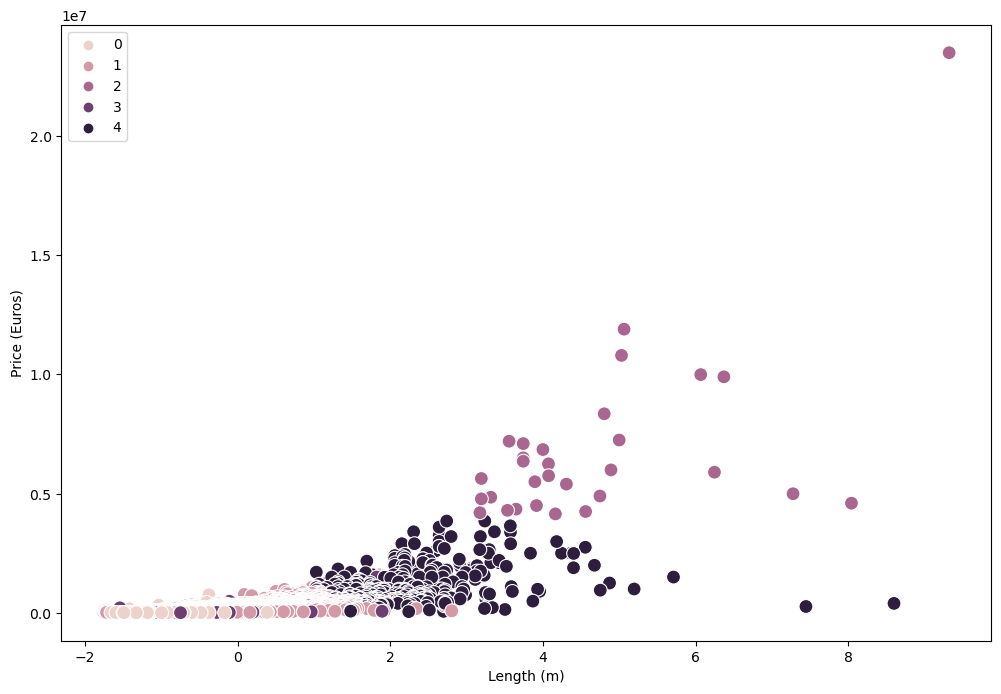

In [21]:
# Plot the clusters for the "EUR_price" and "Length" variables

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df1['Length'], y = df['EUR_price'], hue = kmeans.labels_, s = 100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background
plt.xlabel('Length (m)')
plt.ylabel('Price (Euros)')
plt.show()

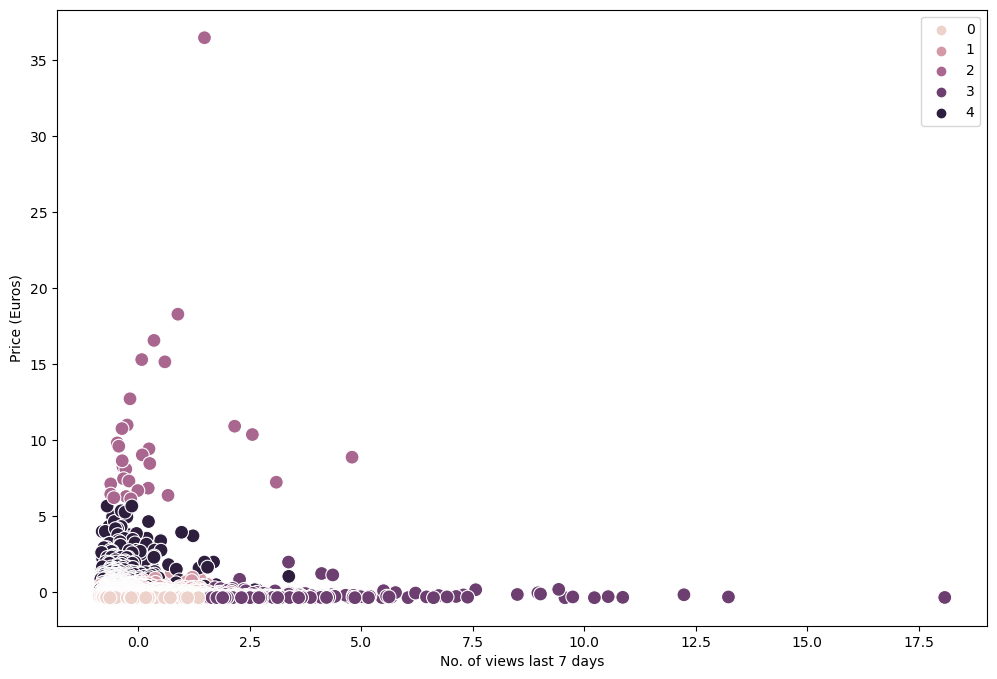

In [22]:
# Plot the clusters for the "7days_views" and "EUR_price" variables

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df1['7days_views'], y =df1['EUR_price'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('No. of views last 7 days')
plt.ylabel('Price (Euros)')
plt.show()

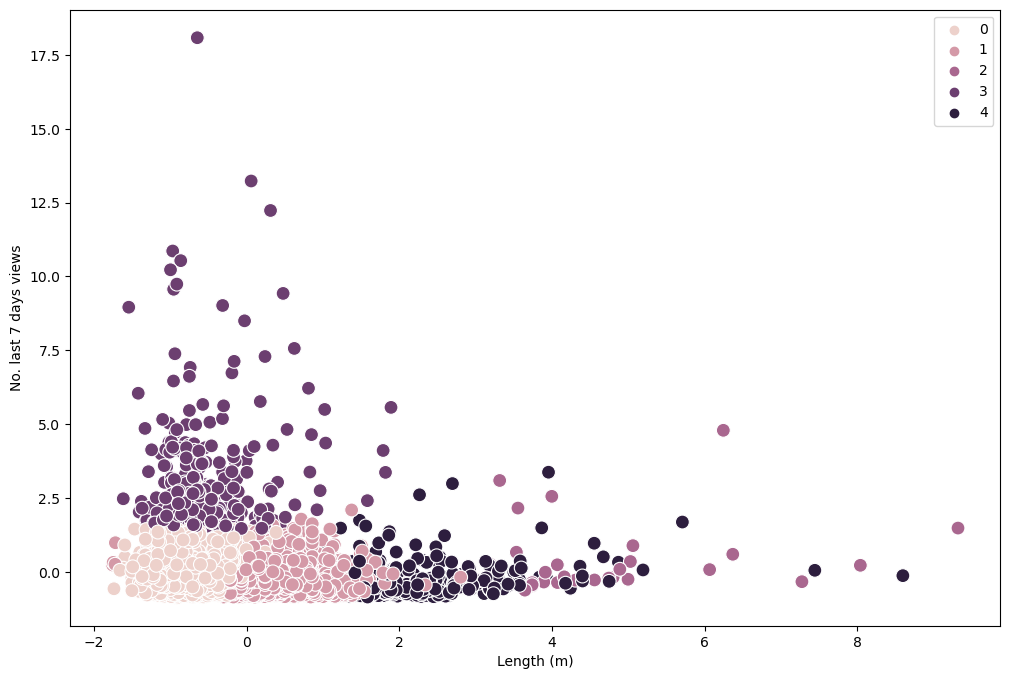

In [23]:
# Plot the clusters for the "Length" and "7days_views" variables

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df1['Length'], y =df1['7days_views'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Length (m)')
plt.ylabel('No. last 7 days views')
plt.show()

#### The graphs do not provide a great deal of insight into the relationship between lenght/ views and price. I will check the individual descriptive statistics of the clusters to see if i can get any better insight. 

In [24]:
df1.loc[df1['clusters'] == 4, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 3, 'cluster'] = 'mid purple'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'light purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'dark pink'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'light pink'

In [25]:
df1.groupby('cluster').agg({'Length':['mean', 'median'],
                           'Width':['mean', 'median'],
                           '7days_views':['mean', 'median'],
                           'EUR_price':['mean','median']})

Length               Width           7days_views            \
                  mean    median      mean    median        mean    median   
cluster                                                                      
dark pink     0.436263  0.395186  0.569417  0.566679   -0.298448 -0.392187   
dark purple   2.101251  1.921903  1.912740  1.710394   -0.350853 -0.473916   
light pink   -0.683403 -0.692084 -0.741838 -0.787105   -0.051324 -0.170350   
light purple  4.686912  4.116043  3.758810  3.451641    0.398253 -0.091540   
mid purple   -0.531707 -0.646695 -0.549668 -0.749760    3.062702  2.427475   

              EUR_price            
                   mean    median  
cluster                            
dark pink     -0.024846 -0.082423  
dark purple    1.219285  0.886345  
light pink    -0.269595 -0.292513  
light purple  10.398597  8.764896  
mid purple    -0.242007 -0.310261

The descriptive statistics of the clusters helps provide a clearer insight into the data as opposed to the scatterplots. We can see that light purple clearly has the best stats overall and it along with the rest of the cluster stats indiacte that boat size is at least somewhat related to boat price. Another thing we can see with the dark light purple (largest boats) is that 7days_views is skewed to the right as the mean is much higher than the median.  

In [26]:
# Exporting df1
df1.to_csv(os.path.join(path, '02 Data', 'clusters.csv'))